In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
df = pd.read_csv('Boston (1).csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
df.shape

(506, 13)

In [6]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


## Initial data manipulation and exploration

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'lstat'}>],
       [<Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

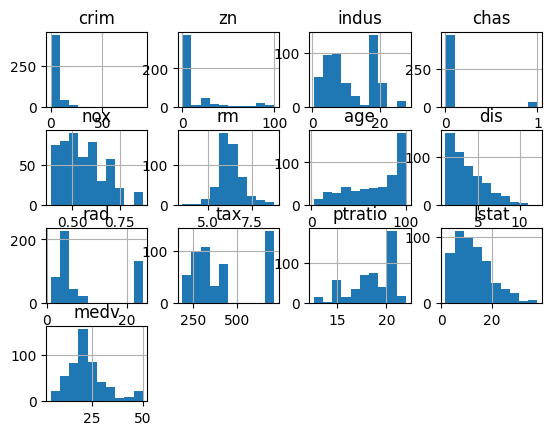

In [7]:
# Histograms.  Do they look "healthy"?  (Are the skewed in one direction?  Are they bimodal?
# For OLS, you really want to have "Gaussian shaped" histograms, and not all features have this property here.
# At this point we just make a note of this, later you can try to improve the outcome by manipulating the
# features.
df.hist()

In [8]:
# Are there missing values?  Look at the "Count" row to see how many entries are available for each column.
# Verify that there are no missing values.
df.count()

,0
crim,506
zn,506
indus,506
chas,506
nox,506
rm,506
age,506
dis,506
rad,506
tax,506


## Run OLS (ordinary least squares) on the Boston data, with medv as the target. First you will need to split the data to train (in this case, 80%) and test (the remaining 20%). Then standard-scale all the features using the training data only.  Finally, train the OLS and utput the R-squared score of the model on both the training and on the test set, as well as the MSE on both.  You can use sklearn.metrics.r2_score for getting the R2 score, or do it as above using the trained LinearRegression object. You can use sklearn.metrics.mean_squared_error for the MSE.  Refer to the documentation of sklearn for usage of both.


In [13]:
# Split the data into train and test
# your code here...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# First, scale all the features of the data using StandardScaler.

# .. your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train the linear regression algorithm on the training set, compute MSE and R2 on both training and test
# ..Your code here...
# Initialize and train the OLS model
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = ols_model.predict(X_train_scaled)
y_test_pred = ols_model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


Training R-squared: 0.739801993681731
Test R-squared: 0.689396788461476
Training MSE: 22.60428647941742
Test MSE: 22.777708563866042


In [ ]:
# A good way to visualize the error structure is to plot the label y against the predicted (y-hat) in the same plot.
# Do this for both train and test and inspect the result.  Do the residuals seem to be evenly distributed across
# the range of y values, or are they higher when y is high?  Perhaps they are  higher when y is low?


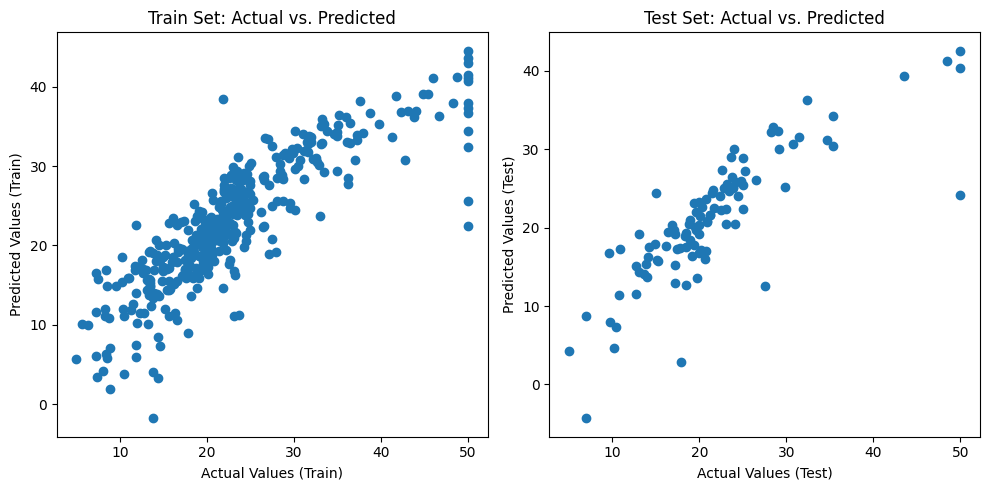

In [19]:
# .. your code for the plot here...
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Train Set: Actual vs. Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Test Set: Actual vs. Predicted")

plt.tight_layout()
plt.show()

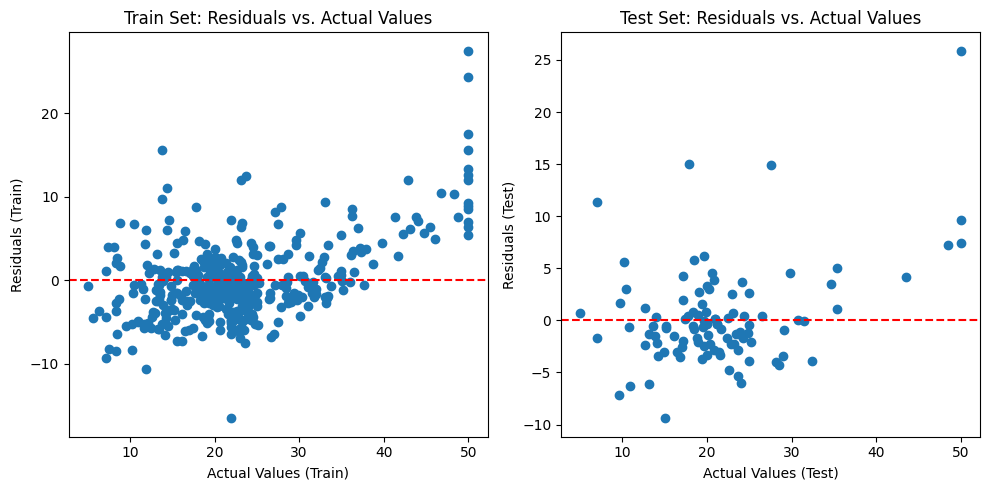

In [17]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Plot residuals vs. actual values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, residuals_train)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Train Set: Residuals vs. Actual Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_test)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Test Set: Residuals vs. Actual Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

plt.tight_layout()
plt.show()

From the residual plots for both the training and test sets, I observe the following patterns:

# Residuals vs. Actual Values (Train Set):

The residuals seem fairly scattered around zero for lower and mid-range actual values.
However, for higher actual values (above ~30), residuals tend to be more spread out and appear to be larger. This suggests the model might not be predicting well for higher values.


# Residuals vs. Actual Values (Test Set):

A similar trend is visible in the test set: residuals are relatively small and evenly distributed for mid-range actual values.
For higher actual values (above ~30), residuals become more extreme, meaning the model struggles with these cases.
There are also some large residuals at the lower end, indicating that predictions for small actual values might also be inconsistent.
Conclusion:
The residuals are not evenly distributed across the range of actual values. They appear to be higher (more spread out) when
𝑦
y is high, meaning the model has more difficulty predicting large values accurately. This could indicate potential issues such as heteroscedasticity (unequal variance of residuals) or model bias for higher values.

## Try to obtain better than the results you got above by using any method you have learned (regularization (Lasso), feature engineering, feature selection..).  You will be graded on efforts (not result)

In [18]:
# Try Lasso regularization
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print(f"\nLasso Regression Results:")
print(f"Training R-squared: {r2_train_lasso}")
print(f"Test R-squared: {r2_test_lasso}")
print(f"Training MSE: {mse_train_lasso}")
print(f"Test MSE: {mse_test_lasso}")

# Analyze Lasso coefficients to see which features are important
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print("\nLasso Coefficients:")
lasso_coefficients



Lasso Regression Results:
Training R-squared: 0.7342174369633028
Test R-squared: 0.6670892499309258
Training MSE: 23.08943593044549
Test MSE: 24.413604757305954

Lasso Coefficients:


,Feature,Coefficient
0,crim,-0.830191
1,zn,0.277040
2,indus,-0.000000
3,chas,0.757061
4,nox,-1.681049
5,rm,3.162588
6,age,-0.000000
7,dis,-2.326771
8,rad,0.517564
9,tax,-0.506835
